# Cat VS Dog

The purpose of this model is to develop a  Convolutional Neural Network for recognizing dog vs cat

In [1]:
import tensorflow as tf
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model

import sys

"""
Benchmark:
Bug : pour fixer le bug modifier le chemin /home/azureuser/DataAnalyzer/src/modules par /home/azureuser/DataAnalyzer/src : executer
 ensuite réexecuter avec /home/azureuser/DataAnalyzer/src/modules

"""
from src.data.data_validator import *
from src.data.data_processing import *


import string

from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

## The data preparation


In [107]:
sns.set(rc = {'figure.figsize':(15,15)})

### Data Validation

Validate the dataset using the data_validator method

In [108]:

training_dir = '/home/azureuser/catvsdog_dataset/training'
testing_dir = '/home/azureuser/catvsdog_dataset/testing'
validation_dir = '/home/azureuser/catvsdog_dataset/validation'

for i in ["cat","dog"]:
    data_validator(training_dir   + "/" + i)
    data_validator(testing_dir    + "/" + i)
    data_validator(validation_dir + "/" + i)

/home/azureuser/.local/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


### Generate directory to read images from & Data augmentation

In [109]:

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)

In [110]:

train_generator = train_datagen.flow_from_directory(training_dir,batch_size=200,class_mode='binary',target_size=(150, 150), shuffle=True)
test_generator = test_datagen.flow_from_directory(testing_dir,class_mode='binary',target_size=(150, 150), shuffle=False)
validation_generator = validation_datagen.flow_from_directory(validation_dir,class_mode='binary',target_size=(150, 150), shuffle=True)

Found 20000 images belonging to 2 classes.
Found 3999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [111]:
dict_directory = {v: k for k, v in train_generator.class_indices.items()}
print(dict_directory)

{0: 'cat', 1: 'dog'}


## Data Visualisation

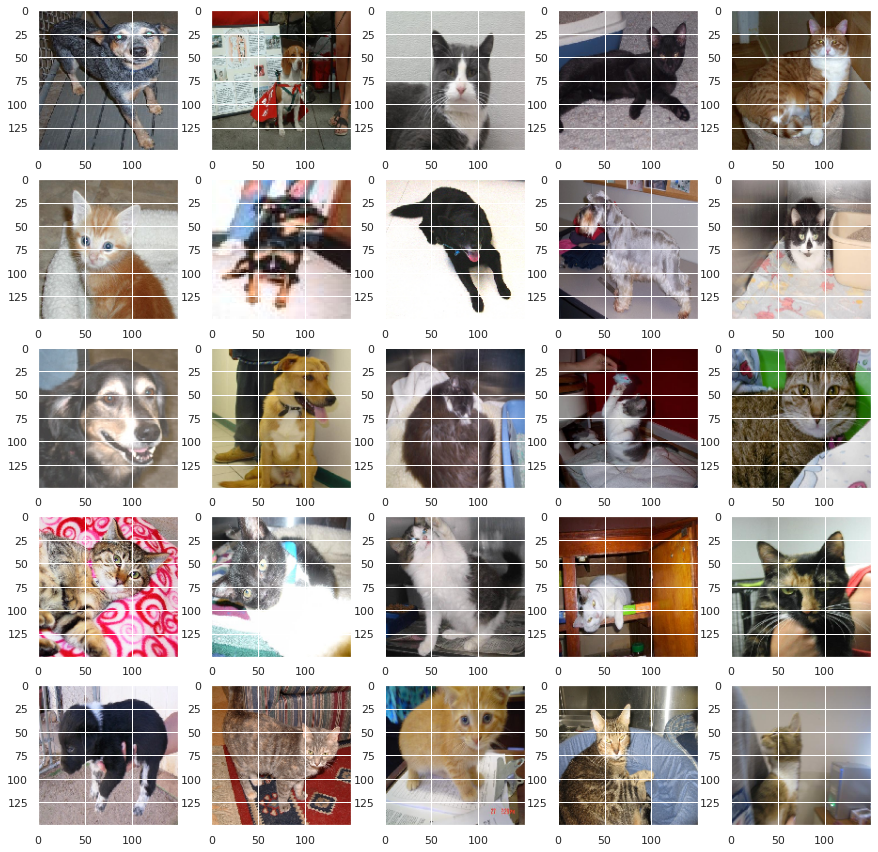

In [113]:
# plot first few images
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, i+1)
	# plot raw pixel data
	pyplot.imshow(train_generator[i][0][0], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

import the dataset

In [114]:
catvsdog_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [115]:
catvsdog_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 64)      

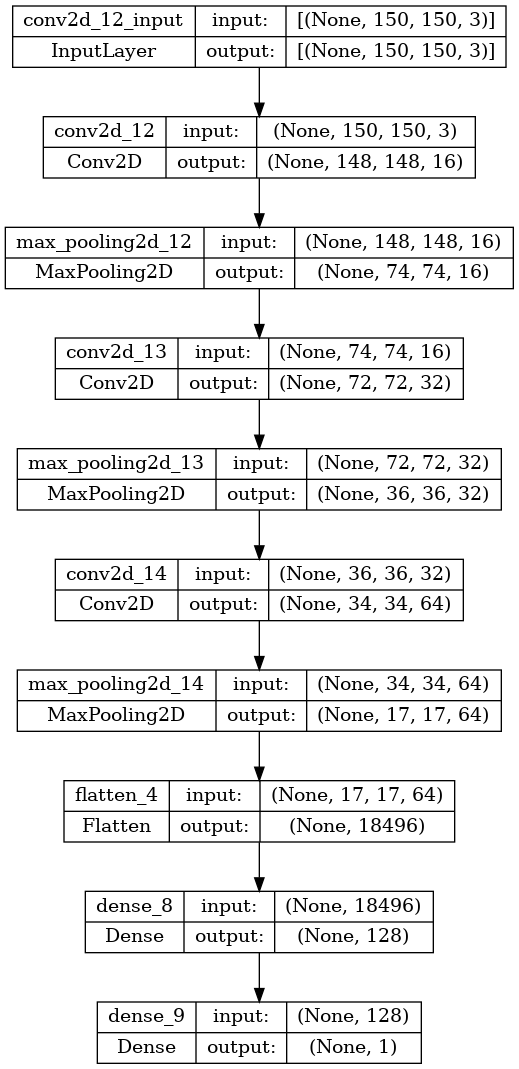

In [116]:
plot_model(catvsdog_model, to_file='../benchmarks/catvsdog_dataset/model_plot_letter_1.png', show_shapes=True, show_layer_names=True)

Build the model with optimizer and loss function

In [117]:
catvsdog_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

Training the model : To find the relation between data and labels

# Fit Model

In [64]:
history = catvsdog_model.fit(train_generator, epochs=50, validation_data=validation_generator, validation_steps=6)

Epoch 1/50
 51/100 [==============>...............] - ETA: 4:23 - loss: 0.6731 - acc: 0.5652

/home/azureuser/.local/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


100/100 [==============================] - 570s 6s/step - loss: 0.6581 - acc: 0.5926 - val_loss: 0.6185 - val_acc: 0.6198
Epoch 2/50
100/100 [==============================] - 625s 6s/step - loss: 0.6082 - acc: 0.6672 - val_loss: 0.5909 - val_acc: 0.7083
Epoch 3/50
100/100 [==============================] - 604s 6s/step - loss: 0.5707 - acc: 0.7040 - val_loss: 0.6221 - val_acc: 0.6615
Epoch 4/50
100/100 [==============================] - 608s 6s/step - loss: 0.5428 - acc: 0.7251 - val_loss: 0.5984 - val_acc: 0.6615
Epoch 5/50
100/100 [==============================] - 631s 6s/step - loss: 0.5268 - acc: 0.7356 - val_loss: 0.5115 - val_acc: 0.7500
Epoch 6/50
100/100 [==============================] - 633s 6s/step - loss: 0.5111 - acc: 0.7475 - val_loss: 0.5130 - val_acc: 0.7500
Epoch 7/50
100/100 [==============================] - 624s 6s/step - loss: 0.4997 - acc: 0.7560 - val_loss: 0.5111 - val_acc: 0.7552
Epoch 8/50
100/100 [==============================] - 590s 6s/step - loss: 0.484

## plot  curves

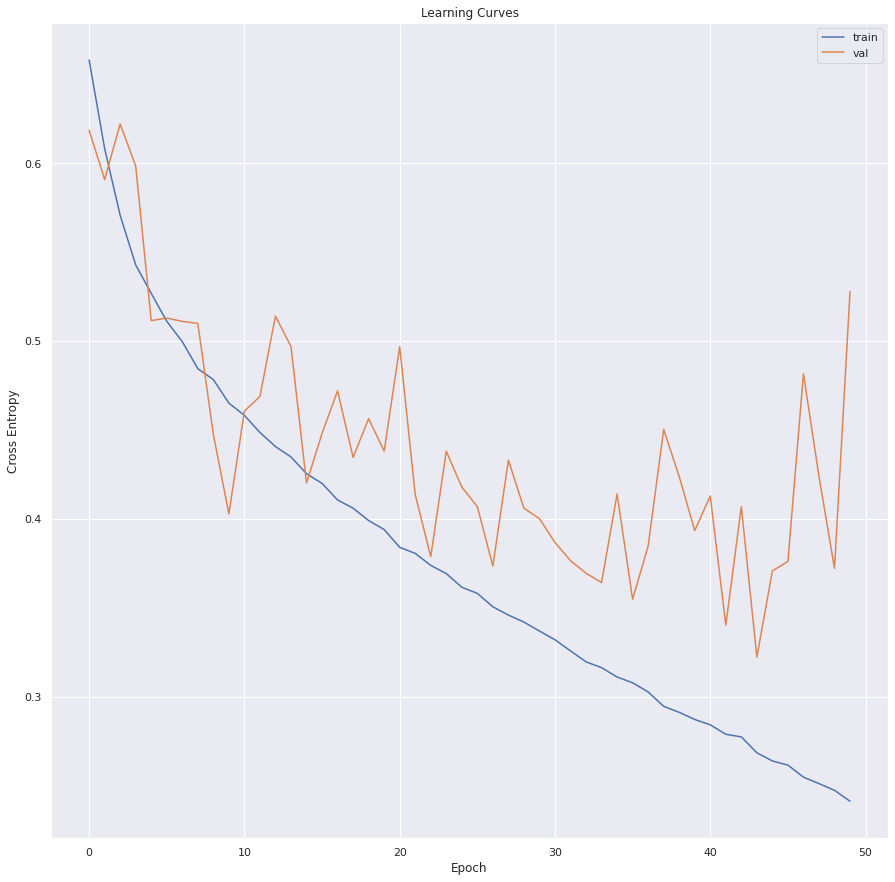

In [118]:

pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Model Evaluation

In [119]:
##TODO

test_generator.reset()
# Evaluate on Validation data
scores = catvsdog_model.evaluate(test_generator)
print("%s%s: %.2f%%" % ("evaluate ",catvsdog_model.metrics_names[1], scores[1]*100))

125/125 [==============================] - 42s 334ms/step - loss: 0.6942 - acc: 0.4884
evaluate acc: 48.84%


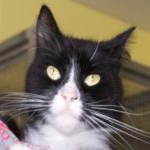

(150, 150, 3)
1/1 [==============================] - 0s 96ms/step
[[8.7663614e-14]]
[0]
0


In [120]:
index = predict_model("/home/azureuser/catvsdog_dataset/testing/cat/10502.jpg","catvsdog",catvsdog_model)
print(index)
#dict_directory[int(index[0])]

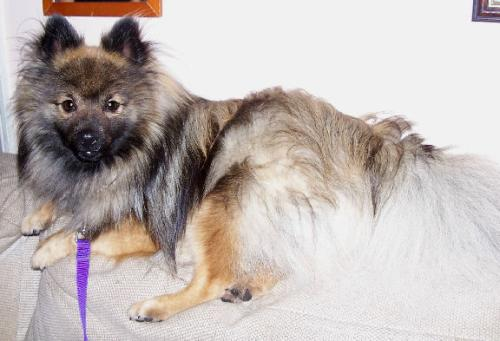

1/1 [==============================] - 0s 34ms/step
[[1.]]
[1.]
 is a dog


In [125]:

def loadImage(path):
    return PImage.open(path +"/" +"10510.jpg")

path =  "/home/azureuser/catvsdog_dataset/testing/dog"

# your images in an array
img = loadImage(path)
img.show()
rimg=img.resize((150,150))
x = np.asarray(rimg)
x = np.expand_dims(x, axis=0)
image = np.vstack([x])
classes = catvsdog_model.predict(image)
print(classes)
print(classes[0])
if classes[0]>0.5:
    print(" is a dog")
else:
    print(" is a cat")

In [93]:
catvsdog_model.save("/home/azureuser/DataAnalyzer/src/models/catvsdog_model.h5")